In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
ener = pd.read_csv("World Energy Consumption.csv", index_col="country")

In [3]:
paises = ener.index.unique()
paises.tolist()

['ASEAN (Ember)',
 'Afghanistan',
 'Africa',
 'Africa (EI)',
 'Africa (Ember)',
 'Africa (Shift)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia & Oceania (EIA)',
 'Asia (Ember)',
 'Asia Pacific (EI)',
 'Asia and Oceania (Shift)',
 'Australia',
 'Australia and New Zealand (EIA)',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS (EI)',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central & South America (EIA)',
 'Central African Republic',
 'Central America (EI)',
 'Central and South America (Shift)',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croa

In [4]:
select = ener.loc[["Spain"]]

In [5]:
select.columns.values.tolist()

['year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consump

In [6]:
spain = select[["year","population","electricity_demand","electricity_generation"]]

In [7]:
spain.reset_index(inplace=True, drop = True)
spain.set_index("year", drop=True, inplace=True)

In [8]:
spain = spain.dropna(how="any").copy()

In [9]:
spain.loc[:,"consumo percapita"] = (spain["electricity_demand"]/spain["population"])*1000000
spain.loc[:,"producion percapita"] = (spain["electricity_generation"]/spain["population"])*1000000

In [11]:
spain1 = spain.drop(["electricity_generation","producion percapita"],axis=1)

In [12]:
spain1.rename(columns={"electricity_demand":"electricity_demand(Twh)","consumo percapita":"consumo_percapita(Kwh)"},
              inplace=True)

In [15]:
pib = pd.read_csv("gdp_in_millions.csv")

In [16]:
pib.set_index("Country", inplace=True)
pib = pib.loc[["Spain"]]
pib.head()

,Year,GDP IN USD$ (Millions)
Country,,
Spain,1960,12400.0
Spain,1961,14200.0
Spain,1962,16600.0
Spain,1963,19600.0
Spain,1964,22000.0


In [17]:
pib.set_index("Year", drop=True, inplace=True)
pib.rename(columns={"GDP IN USD$ (Millions)":"GDP"}, inplace = True)

In [18]:
pib = pib.loc[1990:2022]

In [19]:
españa = pd.concat([spain1, pib], axis=1)
españa.index.name = "year"

In [20]:
españa.loc[:,"GDP percapita"] = (españa["GDP"]/españa["population"])*1000000
españa["GDP percapita"] = españa["GDP percapita"].round(decimals=2)
españa.head()

,population,electricity_demand(Twh),consumo_percapita(Kwh),GDP,GDP percapita
year,,,,,
1990,38889888.0,150.79,3.877358,537000.0,13808.22
1991,38997064.0,154.07,3.950810,577000.0,14795.99
1992,39202248.0,157.33,4.013290,631000.0,16096.02
1993,39420540.0,156.73,3.975846,525000.0,13317.93
1994,39623732.0,162.76,4.107639,531000.0,13401.06


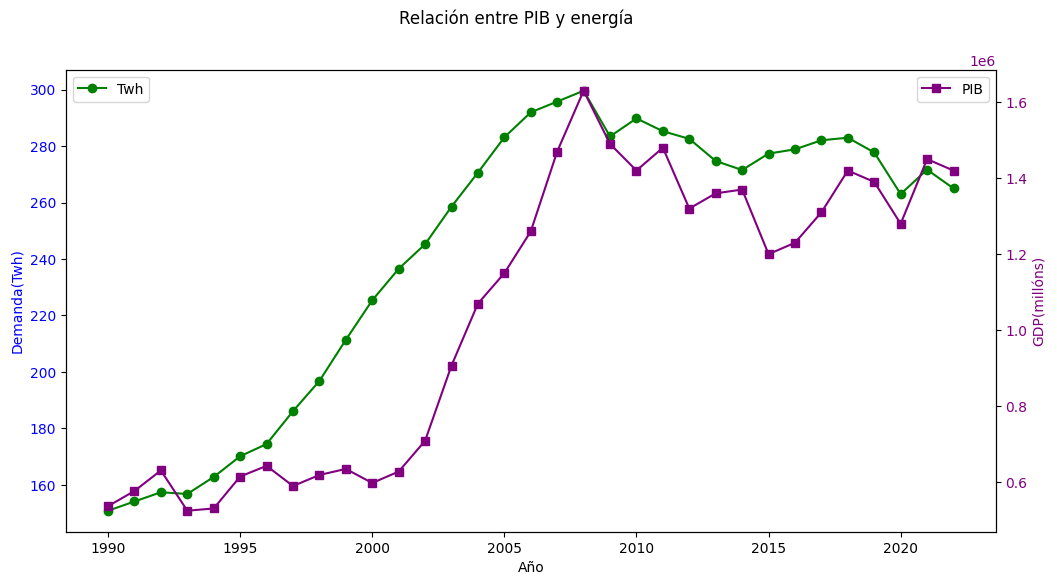

In [21]:
# Ajustar el tamaño del gráfico (ejemplo: 12 pulgadas de ancho y 6 pulgadas de alto)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el PIB y la deuda en el eje izquierdo
ax1.set_xlabel('Año')
ax1.set_ylabel('Demanda(Twh)', color='blue')
ax1.plot(españa['electricity_demand(Twh)'], label='Twh', color='green', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje en el lado derecho que comparta el mismo eje x
ax2 = ax1.twinx()
ax2.set_ylabel('GDP(millóns)', color='purple')
ax2.plot(españa['GDP'], label='PIB', color='purple', marker='s')
ax2.tick_params(axis='y', labelcolor='purple')

# Añadir leyendas y títulos
fig.suptitle('Relación entre PIB y energía')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

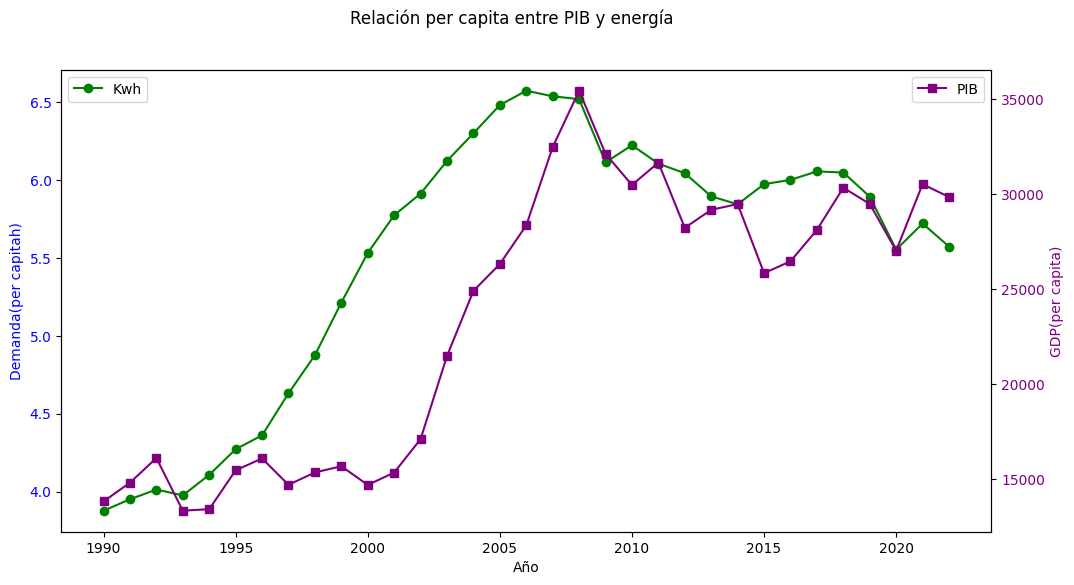

In [22]:
# Ajustar el tamaño del gráfico (ejemplo: 12 pulgadas de ancho y 6 pulgadas de alto)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el PIB y la deuda en el eje izquierdo
ax1.set_xlabel('Año')
ax1.set_ylabel('Demanda(per capitah)', color='blue')
ax1.plot(españa['consumo_percapita(Kwh)'], label='Kwh', color='green', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje en el lado derecho que comparta el mismo eje x
ax2 = ax1.twinx()
ax2.set_ylabel('GDP(per capita)', color='purple')
ax2.plot(españa['GDP percapita'], label='PIB', color='purple', marker='s')
ax2.tick_params(axis='y', labelcolor='purple')

# Añadir leyendas y títulos
fig.suptitle('Relación per capita entre PIB y energía')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

In [1]:
import chardet

In [4]:
with open("32449.csv", "rb") as f:
    result = chardet.detect(f.read())
print(result["encoding"])

sectores = pd.read_csv('32449.csv', encoding=result['encoding'], sep="\t")

ISO-8859-1


In [5]:
sectores.head()

,Agregados macroeconómicos,Total CNAE,CNAE Agrupación A10,CNAE Agrupación A21,CNAE Agrupación A64,Periodo,Total
0,Producción,Total CNAE,"A Agricultura, ganadería, silvicultura y pesca",NaN,NaN,2022,71.684
1,Producción,Total CNAE,"A Agricultura, ganadería, silvicultura y pesca",NaN,NaN,2021,65.073
2,Producción,Total CNAE,"A Agricultura, ganadería, silvicultura y pesca",NaN,NaN,2020,59.719
3,Producción,Total CNAE,"A Agricultura, ganadería, silvicultura y pesca",NaN,NaN,2019,58.237
4,Producción,Total CNAE,"A Agricultura, ganadería, silvicultura y pesca",NaN,NaN,2018,60.795


In [32]:
sectores1 = sectores.pivot(index= "Periodo", columns="CNAE Agrupación A10", values= "Total")

In [7]:
sectores1.head()

CNAE Agrupación A10,"A Agricultura, ganadería, silvicultura y pesca","BDE Industrias extractivas; suministro de energía eléctrica, gas, vapor y aire acondicionado; suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación",C Industria manufacturera,F Construcción,GHI Comercio al por mayor y al por menor; reparación de vehículos de motor y motocicletas; transporte y almacenamiento; hostelería,J Información y comunicaciones,K Actividades financieras y de seguros,L Actividades inmobiliarias,"MN Actividades profesionales, científicas y técnicas; actividades administrativas y servicios auxiliares",OPQ Administración pública y defensa; seguridad social obligatoria; educación; actividades sanitarias y de servicios sociales,"RSTU Actividades artísticas, recreativas y de entretenimiento; otras actividades de servicios; actividades de los hogares como empleadores de personal doméstico; actividades de los hogares como productores de bienes y servicios para uso propio"
Periodo,,,,,,,,,,,
1995,31.923,29.001,252.690,88.319,168.037,25.636,33.586,31.567,38.719,91.825,24.018
1996,36.515,30.881,268.884,91.038,178.616,29.452,35.152,34.672,43.090,97.065,25.227
1997,37.150,33.026,289.821,96.551,191.353,33.073,37.554,37.866,47.538,101.316,26.355
1998,37.972,33.433,308.036,107.671,206.070,37.851,39.326,41.106,53.483,107.087,28.527
1999,37.457,36.637,327.084,123.034,224.623,43.587,39.759,44.687,62.341,114.913,31.384


In [33]:
sectores1.loc[:,"Primario"] = sectores1["A Agricultura, ganadería, silvicultura y pesca"]+sectores1["BDE Industrias extractivas; suministro de energía eléctrica, gas, vapor y aire acondicionado; suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación"]
sectores1.loc[:,"Secundario"] = sectores1["C Industria manufacturera"]
sectores1.loc[:,"Terciario"] = sectores1["GHI Comercio al por mayor y al por menor; reparación de vehículos de motor y motocicletas; transporte y almacenamiento; hostelería"]+sectores1["J Información y comunicaciones"]+sectores1["K Actividades financieras y de seguros"]+sectores1["L Actividades inmobiliarias"]+sectores1["MN Actividades profesionales, científicas y técnicas; actividades administrativas y servicios auxiliares"]+sectores1["OPQ Administración pública y defensa; seguridad social obligatoria; educación; actividades sanitarias y de servicios sociales"]+sectores1["RSTU Actividades artísticas, recreativas y de entretenimiento; otras actividades de servicios; actividades de los hogares como empleadores de personal doméstico; actividades de los hogares como productores de bienes y servicios para uso propio"]
sectores1.loc[:,"Construccion"] = sectores1["F Construcción"]

In [34]:
lista = ["Primario","Secundario","Terciario","Construccion"]

In [35]:
sectores_filtrado = sectores1[lista].copy()
sectores_filtrado.head()

CNAE Agrupación A10,Primario,Secundario,Terciario,Construccion
Periodo,,,,
1995,60.924,252.690,413.388,88.319
1996,67.396,268.884,443.274,91.038
1997,70.176,289.821,475.055,96.551
1998,71.405,308.036,513.450,107.671
1999,74.094,327.084,561.294,123.034


In [36]:
sectores_filtrado.loc[:,"Total"] = sectores_filtrado["Primario"]+sectores_filtrado["Secundario"]+sectores_filtrado["Terciario"]+sectores_filtrado["Construccion"]


In [37]:
for i in lista:
    sectores_filtrado[f"{i}_pct"] = sectores_filtrado[i]/sectores_filtrado["Total"]*100

In [39]:
sectores_filtrado

CNAE Agrupación A10,Primario,Secundario,Terciario,Construccion,Total,Primario_pct,Secundario_pct,Terciario_pct,Construccion_pct
Periodo,,,,,,,,,
1995,60.924,252.690,413.388,88.319,815.321,7.472394,30.992701,50.702484,10.832421
1996,67.396,268.884,443.274,91.038,870.592,7.741399,30.885191,50.916388,10.457022
1997,70.176,289.821,475.055,96.551,931.603,7.532822,31.109926,50.993288,10.363964
1998,71.405,308.036,513.450,107.671,1000.562,7.136489,30.786298,51.316160,10.761052
1999,74.094,327.084,561.294,123.034,1085.506,6.825757,30.131938,51.708051,11.334253
2000,80.668,367.975,618.738,143.164,1210.545,6.663775,30.397466,51.112350,11.826409
2001,87.400,392.664,671.902,163.321,1315.287,6.644938,29.853865,51.084060,12.417138
2002,92.213,404.752,725.938,205.122,1428.025,6.457380,28.343481,50.835104,14.364034
2003,98.881,417.289,780.973,232.888,1530.031,6.462680,27.273238,51.042953,15.221130


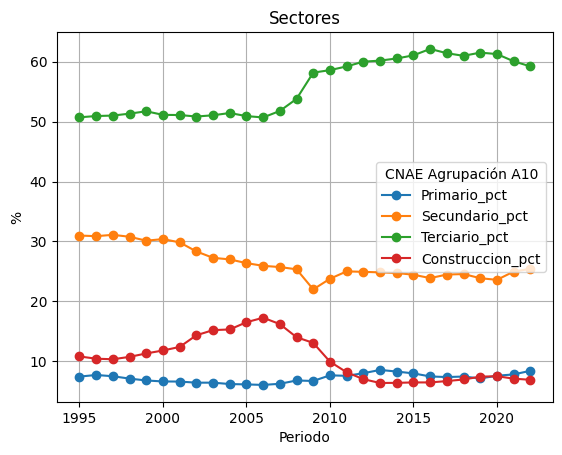

In [46]:
# Graficar el PIB y la deuda en el eje izquierdo
sectores_filtrado.plot(y=["Primario_pct","Secundario_pct","Terciario_pct","Construccion_pct"], kind="line", marker="o" )

# Añadir etiquetas y título
plt.title('Sectores')
plt.xlabel('Periodo')
plt.ylabel('%')
plt.grid(True)
